In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [134]:
# Read the data
Bike_Sharing = pd.read_csv("/Users/krishna/Downloads/day.csv")
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [136]:
# checking the shape of dataframe
Bike_Sharing.shape

(730, 16)

In [137]:
# describing the columns of dataframe
Bike_Sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [141]:
# get the info about columns
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [143]:
# checking for the null values in column data
Bike_Sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [145]:
# renaming few columns for better readibility
Bike_Sharing.rename (columns={'yr': 'year', 'mnth': 'month', 'hum': 'humidity'}, inplace=True)

In [146]:
# Check the head of the dataset
Bike_Sharing.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [147]:
# Copying the dataframe into new
Bike_Sharing_copy = Bike_Sharing.copy()

In [148]:
# checking the shape of new dataframe
Bike_Sharing_copy.shape

(730, 16)

In [149]:
# dropping the duplicates
Bike_Sharing_copy.drop_duplicates(inplace=True)

In [150]:
# re-verifying the shape of new dataframe
Bike_Sharing_copy.shape

(730, 16)

In [151]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and mont
# casual and registered seems to be the breakup by category for cnt column.
Bike_Sharing.drop( ['instant', 'dteday', 'casual', 'registered'],axis=1, inplace=True)

In [153]:
# Encoding/mapping the season column
Bike_Sharing.season = Bike_Sharing.season.map( {1:'spring', 2:'summer', 3:'fall', 4: 'winter'})

In [158]:
# Encoding/mapping the month column
Bike_Sharing.month = Bike_Sharing.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [159]:
# Encoding/mapping the weekday column
Bike_Sharing.weekday = Bike_Sharing.weekday.map({0: 'sun', 1: 'mon',2: 'tue' ,3: 'wed', 4: 'thu' ,5:'fri' ,6:'sat'})

In [160]:
# Encoding/mapping the weathersit column
Bike_Sharing.weathersit = Bike_Sharing.weathersit.map({1:'clear',2:'mist',3:'Light_snow',4:'heavy_rain'})

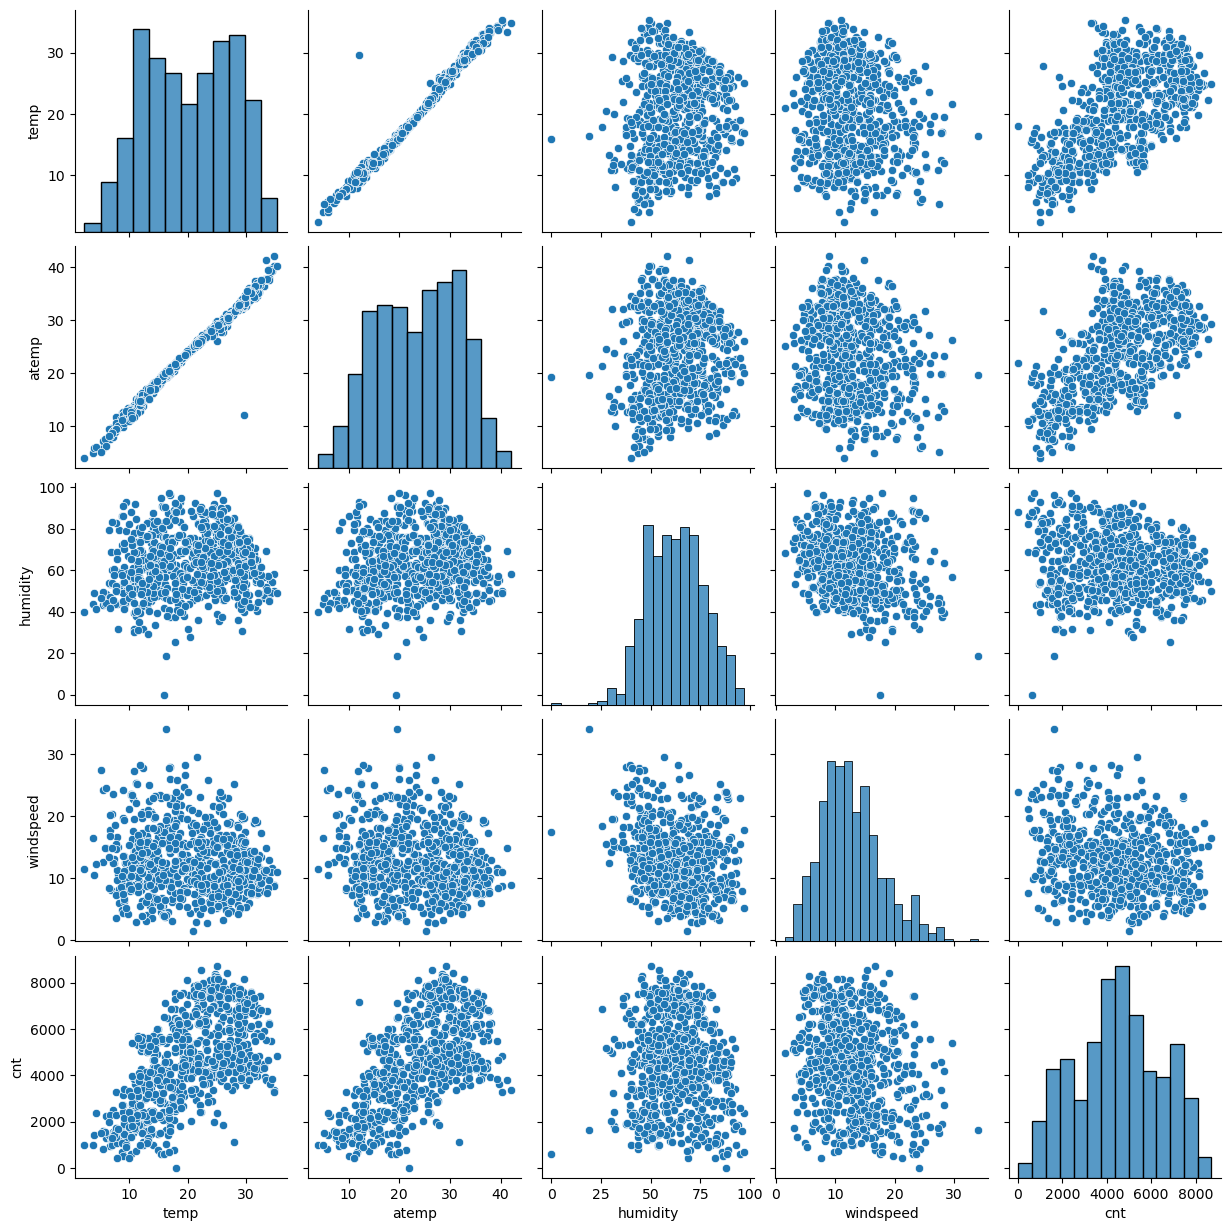

In [162]:
# Analysing/visualizing the numerical columns
sns.pairplot(data=Bike_Sharing,vars= [ 'temp', 'atemp', 'humidity', 'windspeed', 'cnt' ])
plt.show()

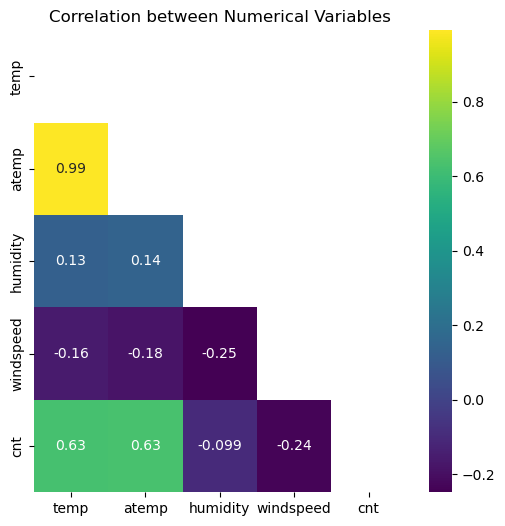

In [166]:
# Checking the correlation between the numerical variables
plt.figure(figsize = (6,6))
matrix = np.triu(Bike_Sharing[[ 'temp','atemp', 'humidity', 'windspeed', 'cnt']].corr())
sns.heatmap(Bike_Sharing[[ 'temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr(), annot=True, cmap="viridis", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [170]:
# Dummy variable creation for month, weekday, weathersit and season variables
months_Bike_Sharing=pd.get_dummies(Bike_Sharing.month,drop_first=True)
weekdays_Bike_Sharing=pd.get_dummies(Bike_Sharing.weekday,drop_first=True)
weathersit_Bike_Sharing=pd.get_dummies(Bike_Sharing.weathersit,drop_first=True)
seasons_Bike_Sharing=pd.get_dummies(Bike_Sharing.season,drop_first=True)

In [171]:
Bike_Sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [175]:
# Merging the dataframe, with the dummy variable dataset.
Bike_Sharing_new = pd.concat([Bike_Sharing, months_Bike_Sharing, weekdays_Bike_Sharing, weathersit_Bike_Sharing, seasons_Bike_Sharing], axis=1)

In [176]:
Bike_Sharing_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,1,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,1,0,1,0,0


In [177]:
Bike_Sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  july        730 non-null    uint8  
 17  june        730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [178]:
# dropping unnecessary columns as we have already created dummy variable out of it.
Bike_Sharing_new.drop(['season','month', 'weekday', 'weathersit'], axis = 1, inplace = True)

In [179]:
# check the head of new dataframe
Bike_Sharing_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,1,0,0


In [307]:
# check the shape of new dataframe
Bike_Sharing_new.shape

(730, 30)

In [308]:
# check the column info of new dataframe
Bike_Sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    uint8  
 9   dec         730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  jan         730 non-null    uint8  
 12  july        730 non-null    uint8  
 13  june        730 non-null    uint8  
 14  mar         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  nov         730 non-null    uint8  
 17  oct         730 non-null    uint8  
 18  sep         730 non-null    uint8  
 19  mon         730 non-null    u

In [309]:
# splitting the dataframe into Train and Test
np.random.seed(0)
Bike_Sharing_train,Bike_Sharing_test = train_test_split(Bike_Sharing_new, train_size = 0.7, random_state = 100)

In [310]:
# check the shape of training datatset
Bike_Sharing_train.shape

(510, 30)

In [311]:
#check the shape of testing datatset
Bike_Sharing_test.shape

(220, 30)

In [211]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

In [312]:
# verifying the head of dataset before scaling.
Bike_Sharing_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [213]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'temp','atemp', 'humidity', 'windspeed', 'cnt' ]
Bike_Sharing_train[num_vars] = scaler.fit_transform(Bike_Sharing_train[num_vars])

In [214]:
# verifying the head after appying scaling.
Bike_Sharing_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,1,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [215]:
# describing the dataset
Bike_Sharing_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,clear,mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


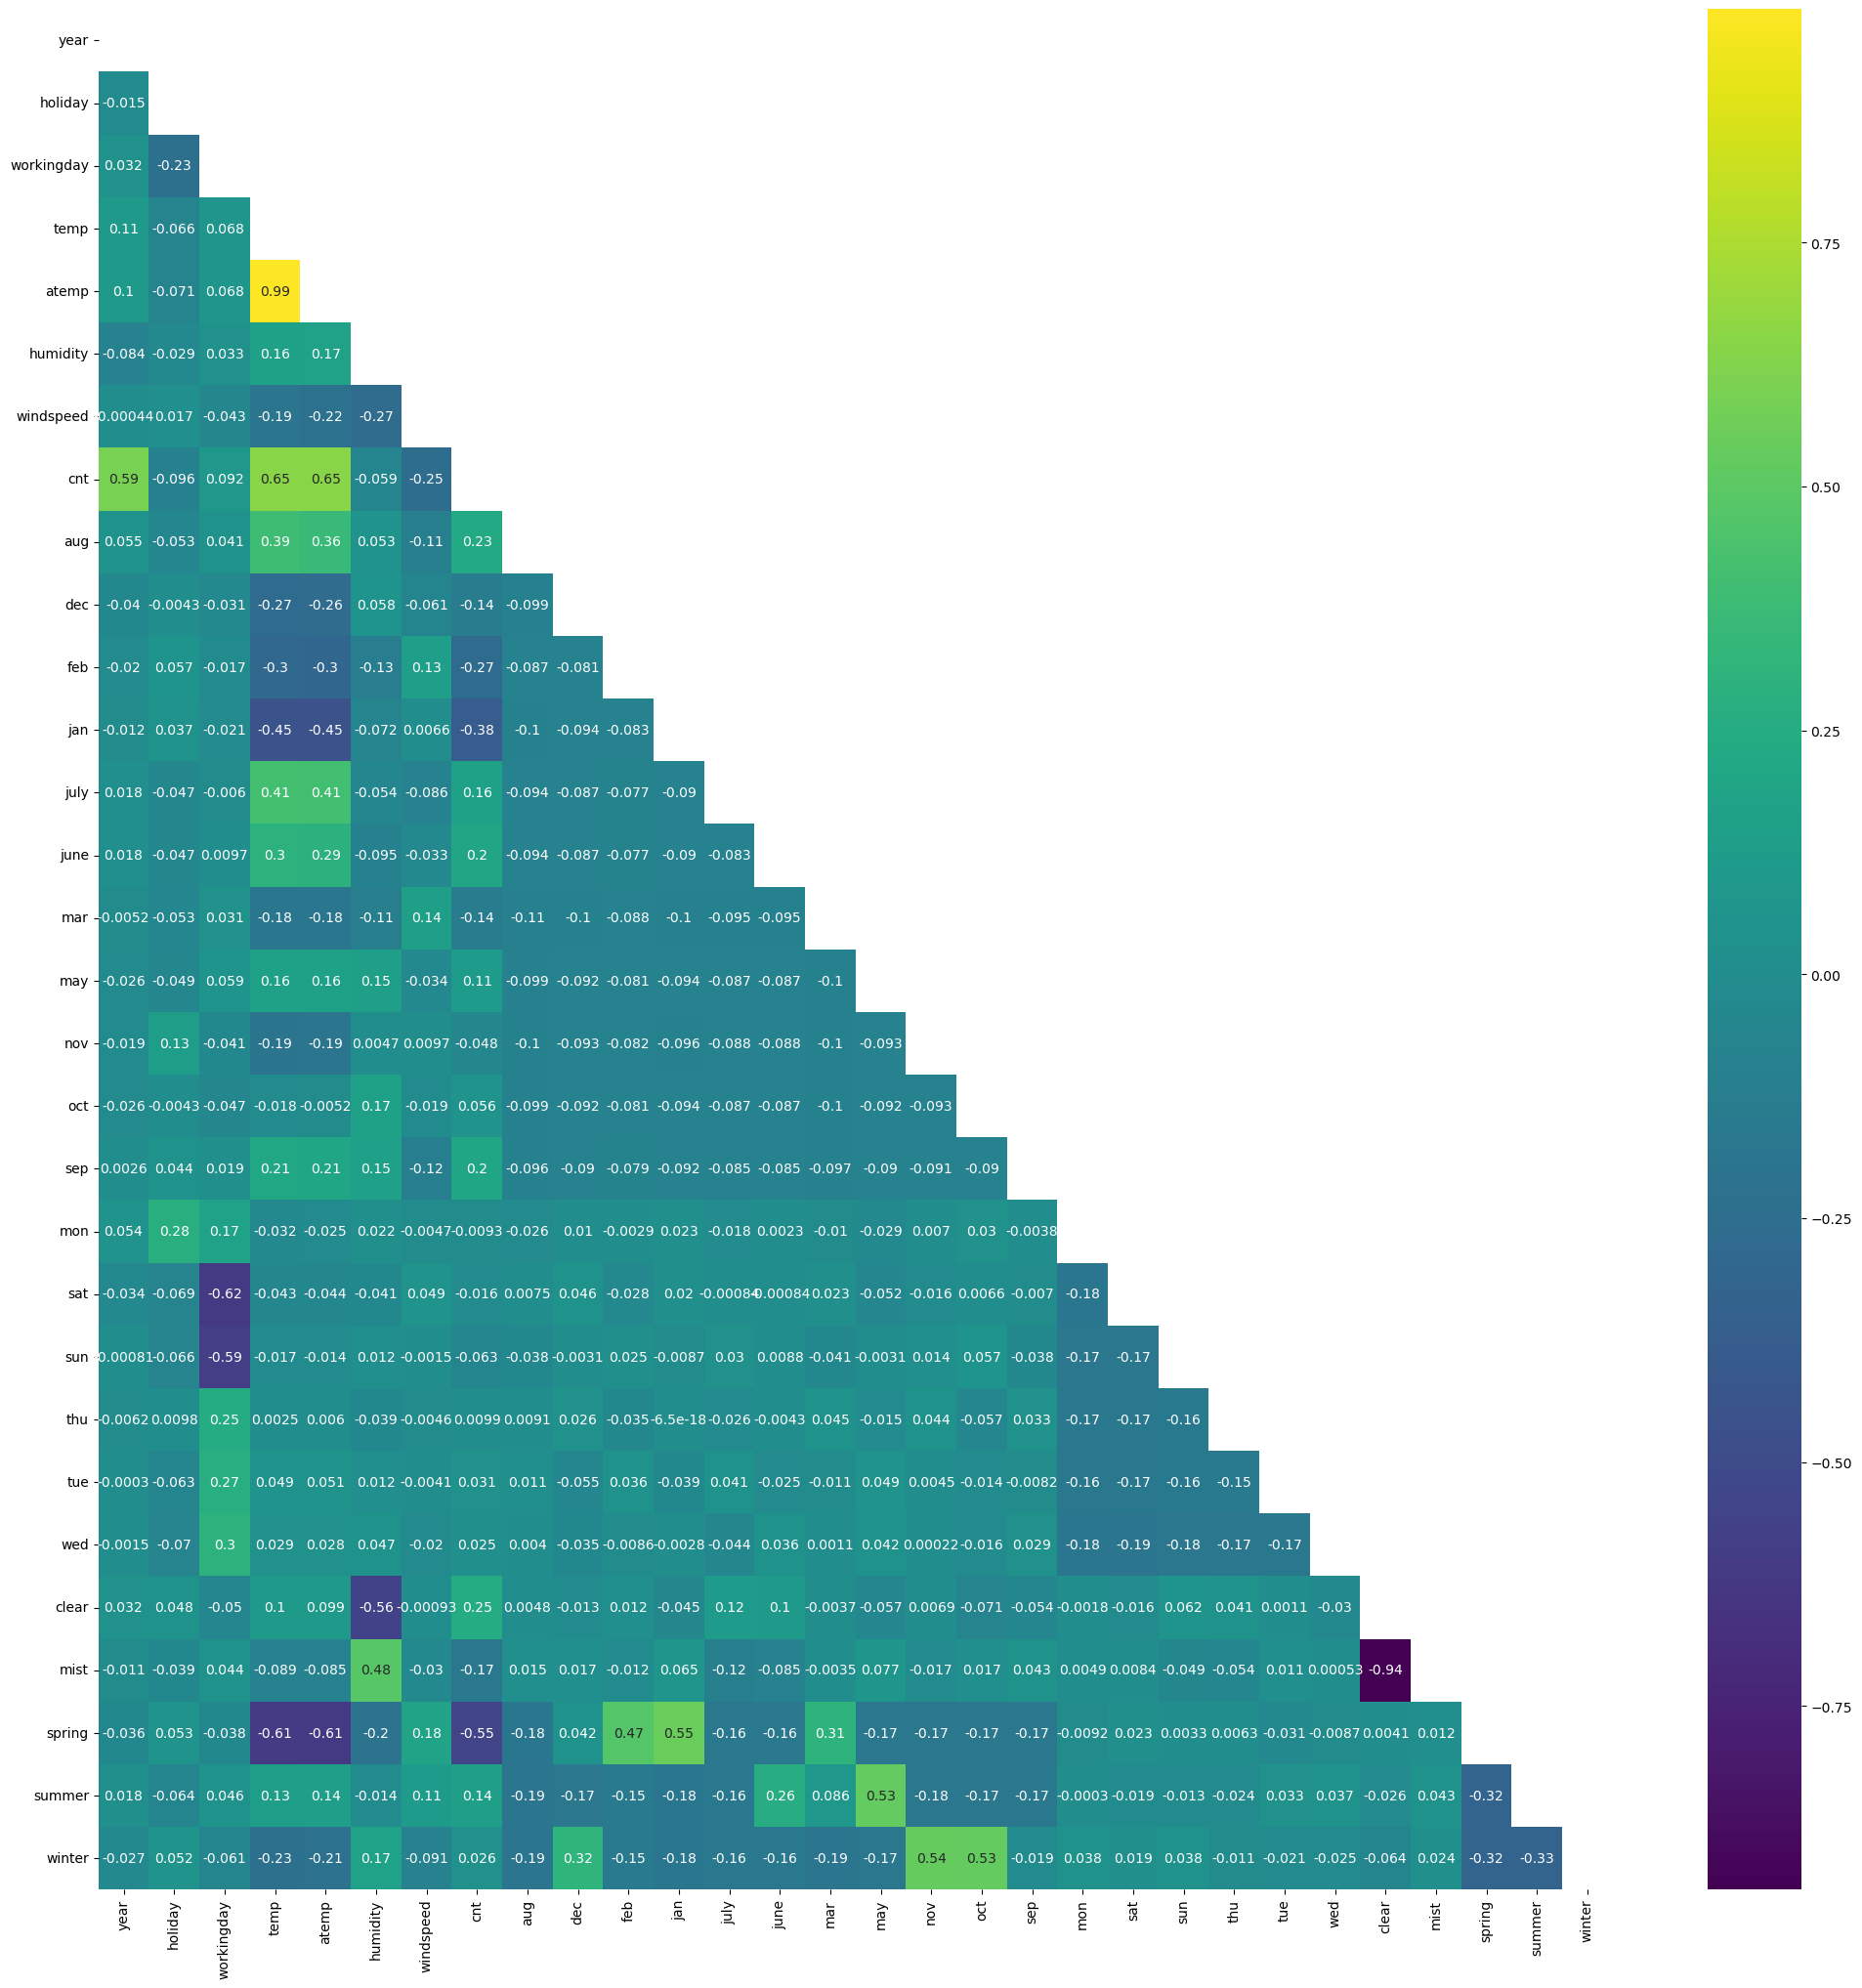

In [193]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
matrix = np.triu(Bike_Sharing_train.corr())
sns.heatmap(Bike_Sharing_train.corr(), annot = True, cmap="viridis", mask=matrix)
plt.show()

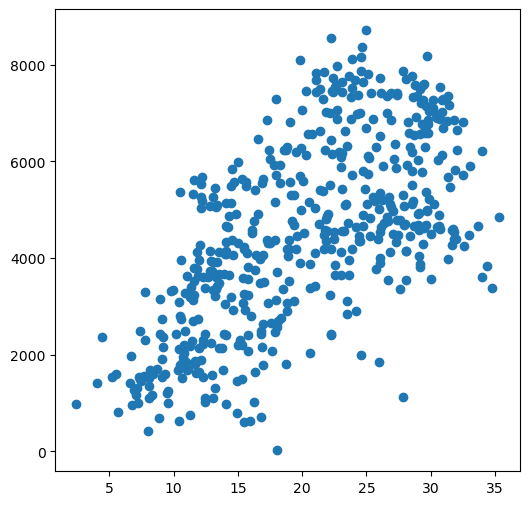

In [313]:
# Visualizing one of the correlation to see the trends via Scatter plot.
plt.figure(figsize= [6,6])
plt.scatter(Bike_Sharing_train.temp, Bike_Sharing_train.cnt)
plt.show()

In [314]:
# Check the column names in the DataFrame
print(Bike_Sharing_train.columns)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'clear', 'mist', 'spring', 'summer', 'winter'],
      dtype='object')


In [217]:
# Building the Linear Model
y_train = Bike_Sharing_train.pop('cnt')
X_train = Bike_Sharing_train

In [238]:
# Recursive feature elimination
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [242]:
# Create your linear regression model
lm = LinearRegression()


In [243]:
# Specify the number of features you want to select
num_features_to_select = 15

In [250]:
# Set the model for RFE
rfe.estimator_ = lm

In [252]:
# Initialize RFE without specifying the model
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)

In [253]:
# Fit RFE to your training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [268]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 4),
 ('dec', False, 10),
 ('feb', False, 14),
 ('jan', False, 3),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 5),
 ('may', False, 12),
 ('nov', False, 15),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 9),
 ('tue', False, 8),
 ('wed', False, 13),
 ('clear', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [269]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe. support_]
print (col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'clear', 'mist', 'spring', 'summer',
       'winter'],
      dtype='object')


In [256]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [258]:
# Generic function to calculate VIF of variables
def calculateVIF(Bike_Sharing):
    vif = pd.DataFrame()
    vif['Features'] = Bike_Sharing.columns
    vif['VIF'] = [variance_inflation_factor(Bike_Sharing.values, i) for i in range(Bike_Sharing.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


In [259]:
# dataframe with RPB selected variables
X_train_rfe = X_train[col]

In [260]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,94.54
8,sat,22.15
9,sun,21.46
10,clear,10.25
11,mist,8.87
12,spring,5.02
1,holiday,4.66
3,temp,3.62
14,winter,3.49
13,summer,2.62


In [262]:
# Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()
print (lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          2.11e-191
Time:                        00:28:20   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.038      0.093      0.9

In [264]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,workingday,58.53
7,sat,14.14
8,sun,13.46
9,clear,8.65
10,mist,8.59
11,spring,4.96
3,temp,3.39
13,winter,3.35
1,holiday,3.29
12,summer,2.60


In [265]:
# Building 2nd Linear Regression Model
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.28e-188
Time:                        00:44:48   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0961      0.030     -3.158      0.0

In [270]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)
#Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
8,clear,14.61
3,temp,13.30
9,mist,8.22
2,workingday,5.10
4,windspeed,4.59
10,spring,4.13
11,summer,2.79
12,winter,2.73
0,year,2.07
7,sun,1.89


In [271]:
# Building 3rd Linear Regression Model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.28e-188
Time:                        00:52:19   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0741      0.038     -1.933      0.0

In [272]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['workingday'], axis = 1)
#Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
7,clear,14.10
2,temp,12.55
8,mist,7.92
3,windspeed,4.59
9,spring,3.99
10,summer,2.74
11,winter,2.65
0,year,2.07
4,july,1.59
5,sep,1.35


In [273]:
# Building 4th Linear Regression Model
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.45e-189
Time:                        00:53:49   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0835      0.037     -2.241      0.0

In [315]:
# Check the column names in the DataFrame
print(Bike_Sharing_train.columns)

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'clear', 'mist', 'spring', 'summer', 'winter'],
      dtype='object')


In [316]:
# Building the Linear Model
y_train = Bike_Sharing_train.pop('cnt')
X_train = Bike_Sharing_train

In [317]:
# Recursive feature elimination
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [318]:
# Create your linear regression model
lm = LinearRegression()

In [320]:
# Specify the number of features you want to select
num_features_to_select = 29

In [321]:
# Set the model for RFE
rfe.estimator_ = lm

In [322]:
# Initialize RFE without specifying the model
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)

In [323]:
# Fit RFE to your training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=29)

In [326]:
y_pred = rfe.predict(X_train)

In [340]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.8525995845610338